In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

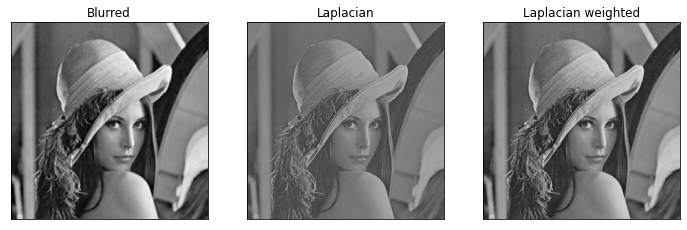

In [19]:
tiff_img = cv2.imread("C:\\Work\\Image_processing\\lena.tiff",cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(tiff_img,cv2.COLOR_RGB2GRAY).astype(np.double)
height, width = gray_img.shape
gray_pad = cv2.copyMakeBorder(gray_img,1,1,1,1,cv2.BORDER_REPLICATE)

mean_3x3 = (1/9)*np.ones((3,3))
laplacian_4 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
laplacian_8 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

blurred = np.zeros((height,width))
sharped = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        blurred[i][j] = np.sum(gray_pad[i:i+3,j:j+3] * mean_3x3)
        sharped[i][j] = np.sum(gray_pad[i:i+3,j:j+3] * laplacian_4)

laplacian = cv2.Laplacian(gray_img,cv2.CV_64F)        
test = blurred + laplacian

result = blurred + sharped
result_w = blurred + 0.5 * sharped


rows = 1
cols = 3
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(blurred,cmap='gray')
axes[0].set_title('Blurred')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(result,cmap='gray')
axes[1].set_title('Laplacian')
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].imshow(result_w,cmap='gray')
axes[2].set_title('Laplacian weighted')
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

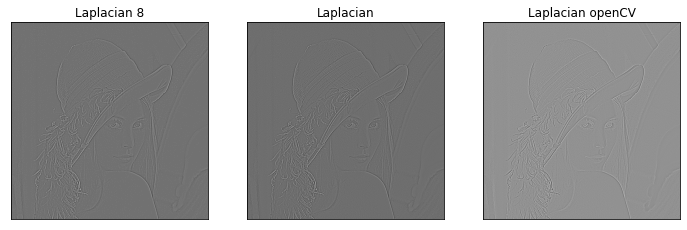

In [23]:
tiff_img = cv2.imread("C:\\Work\\Image_processing\\lena.tiff",cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(tiff_img,cv2.COLOR_RGB2GRAY).astype(np.double)
height, width = gray_img.shape
gray_pad = cv2.copyMakeBorder(gray_img,1,1,1,1,cv2.BORDER_REPLICATE)

mean_3x3 = (1/9)*np.ones((3,3))
laplacian_4 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
laplacian_8 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

blurred = np.zeros((height,width))
sharped = np.zeros((height,width))
sharped_8 = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        blurred[i][j] = np.sum(gray_pad[i:i+3,j:j+3] * mean_3x3)
        sharped[i][j] = np.sum(gray_pad[i:i+3,j:j+3] * laplacian_4)
        sharped_8[i][j] = np.sum(gray_pad[i:i+3,j:j+3] * laplacian_8)

laplacian = cv2.Laplacian(gray_img,cv2.CV_64F)        
test = blurred + laplacian

result = blurred + sharped
result_w = blurred + 0.5 * sharped


rows = 1
cols = 3
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(sharped_8,cmap='gray')
axes[0].set_title('Laplacian 8')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(sharped,cmap='gray')
axes[1].set_title('Laplacian')
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].imshow(laplacian,cmap='gray')
axes[2].set_title('Laplacian openCV')
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()